# 22k-4005 Mujtaba Saqib Lab 9

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

<img src = "question.png"/>

The sample space for four sibling children. Each row in the sample space contains 1 of 16 possible outcomes.
Every outcome represents a unique combination of four children. The gender of each child is indicated by a
letter: B for boy and G for girl. Outcomes with two boys are marked by an arrow. Calculate the probability
of two boys.

In [46]:
def probabilty(no_of_boys,total_space):
    return two_boys/total_space
    
    
two_boys=6
total_space=16

probabilty(two_boys,total_space)

0.375

A die is loaded in such a way that an even number is twice as likely to occur as an odd number. If E is the
event that a number less than 4 occurs on a single toss of the die, find P (E).

In [47]:
prob_odd = 1 / 3
prob_even = 2 / 3

prob_odd_each = prob_odd / 3  
prob_even_each = prob_even / 3 

odd_less_than_4 = prob_odd_each * 2 
even_less_than_4 = prob_even_each 

prob_E = odd_less_than_4 + even_less_than_4

print("prob of event E",prob_E)


prob of event E 0.4444444444444444


A bag contains 10 red marbles and 20 blue marbles. If you draw a marble at random, what is the probability
that it is red given that it is blue? This is an example of conditional probability because we are given that the
marble is blue, and we want to find the probability that it is red.

In [48]:
total_marbles=30
red_marbles=10
blue_marbles=20

prob_red=red_marbles/total_marbles
prob_blue=blue_marbles/total_marbles
given=0

#conditional formula P(R/B)=(P(B/R)*P(R)/P(B))
prob=(given*prob_red)/prob_blue

print("probability that it is red given that it is blue  ",prob)
print("blue probability ",prob_blue)
print("red probability ",prob_red)

probability that it is red given that it is blue   0.0
blue probability  0.6666666666666666
red probability  0.3333333333333333


Using a Hidden Markov Model, diagnose whether a person is healthy or sick based on the observation of
cough or no cough. The model has two possible states: healthy and sick, and two possible observations: cough
and no cough.

In [49]:
#code as per lab manual instructions, only probabilities were changed
states = ["healthy", "sick"]
n_states = len(states)
print('number of hidden states ',n_states)
observations = ["cough", "no cough"]
n_observations = len(observations)
print('number of observations ',n_observations)

number of hidden states  2
number of observations  2


In [50]:
state_probability = np.array([0.4, 0.6])
print("state probability: ", state_probability)

transition_probability = np.array([[0.3, 0.7], [0.4, 0.6]])
print("\ntransition probability:\n", transition_probability)

emission_probability= np.array([[0.9, 0.1], [0.2, 0.8]])
print("\nemission probability:\n", emission_probability)

state probability:  [0.4 0.6]

transition probability:
 [[0.3 0.7]
 [0.4 0.6]]

emission probability:
 [[0.9 0.1]
 [0.2 0.8]]


In [51]:
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

In [52]:
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [53]:
hidden_states = model.predict(observations_sequence)
print("most likely hidden states ", hidden_states)

most likely hidden states  [0 1 0 1 0 0]


In [54]:
log_probability, hidden_states = model.decode(observations_sequence, lengths =
len(observations_sequence), algorithm ='viterbi' )
print('log Probability :',log_probability)
print("most likely hidden states:", hidden_states)

log Probability : -5.533924053085589
most likely hidden states: [0 1 0 1 0 0]


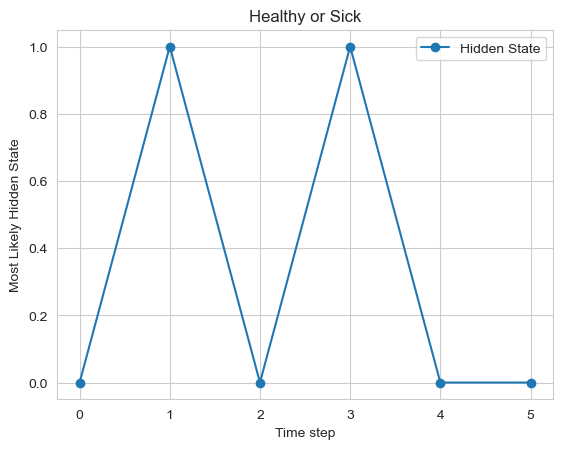

In [56]:
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Healthy or Sick")
plt.legend()
plt.show()

A manufacturing firm employs three analytical plans for the design and development of a particular product.
For cost reasons, all three are used at varying times. In fact, plans 1, 2, and 3 are used for 30%, 20%, and
50% of the products, respectively. The defect rate is different for the three procedures as follows: P(D|P1)
=0.01, P(D|P2) =0.03, P(D|P3) =0.02, where P (D|Pj) is the probability of a defective product, given plan j.
If a random product was observed and found to be defective, which plan was most likely used and thus
responsible?

In [58]:
#plan 1
P_P1 = 0.30
#plan 2
P_P2 = 0.20
#plan 3
P_P3 = 0.50

#defective product plan 1
P_D_P1 = 0.01 
#defective product plan 2
P_D_P2 = 0.03 
#defective product plan 3
P_D_P3 = 0.02 

#total probability of a defective product
P_D = P_P1 * P_D_P1 + P_P2 * P_D_P2 + P_P3 * P_D_P3

#probabilities of plans
P_P1_D = (P_D_P1 * P_P1) / P_D
P_P2_D = (P_D_P2 * P_P2) / P_D
P_P3_D = (P_D_P3 * P_P3) / P_D

if P_P1_D > P_P2_D and P_P1_D > P_P3_D:
    print("plan 1 was most likely used")
elif P_P2_D > P_P1_D and P_P2_D > P_P3_D:
    print("plan 2 was most likely used")
else:
    print("plan 3 was most likely used")


plan 3 was most likely used
